In [1]:
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib notebook

Using TensorFlow backend.


In [2]:
data = pd.read_csv("tab.csv")
data.describe()
closing_index = data[['Close']][::-1].values
data.describe()

,Open,High,Low,Volume,Close,Adj Close
count,2127.000000,2127.000000,2127.000000,2.127000e+03,2127.000000,2127.000000
mean,5809.744099,5853.275248,5758.625411,2.439480e+05,5806.533757,5806.533757
std,1427.126822,1421.379448,1428.948308,5.235836e+06,1424.112413,1424.112413
min,2526.199951,2585.300049,2252.750000,0.000000e+00,2524.199951,2524.199951
25%,5022.199951,5067.649902,4979.574951,0.000000e+00,5024.125000,5024.125000
50%,5568.399902,5608.200195,5524.100098,0.000000e+00,5565.649902,5565.649902
75%,6268.650147,6302.449951,6231.000000,1.257000e+05,6272.975098,6272.975098
max,9109.150391,9119.200195,8925.549805,1.631569e+08,8996.250000,8996.250000


In [3]:
#make sequences of a given length
sequence_length = 50
result,normalised_data = [],[]
for index in range(len(closing_index) - sequence_length):
        result.append(closing_index[index: index + sequence_length])
        
#normalize in a window to detect percentage changes from the start
for window in result:
    normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalised_data.append(normalised_window)
normalised_data = np.array(normalised_data)

In [4]:
row = round(0.6 * normalised_data.shape[0])
train = normalised_data[:int(row), :]
np.random.shuffle(train)
x_train = train[:, :-1]
y_train = train[:, -1]
x_test = normalised_data[int(row):, :-1]
y_test = normalised_data[int(row):, -1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

In [5]:
model = Sequential()
model.add(LSTM(
        input_dim=1,
        output_dim=50,
        return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(
        100,
        return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
        output_dim=1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="rmsprop")

In [ ]:
model.fit(
    x_train,
    y_train,
    batch_size=512,
    nb_epoch=50,
    validation_split=0.05)

Train on 1183 samples, validate on 63 samples
Epoch 1/50
1183/1183 [==============================] - 3s - loss: 0.0050 - val_loss: 0.0024
Epoch 2/50
1183/1183 [==============================] - 3s - loss: 0.0034 - val_loss: 0.0023
Epoch 3/50
1183/1183 [==============================] - 3s - loss: 0.0030 - val_loss: 0.0018
Epoch 4/50
1183/1183 [==============================] - 3s - loss: 0.0025 - val_loss: 0.0019
Epoch 5/50
1183/1183 [==============================] - 3s - loss: 0.0026 - val_loss: 0.0015

<IPython.core.display.Javascript object>


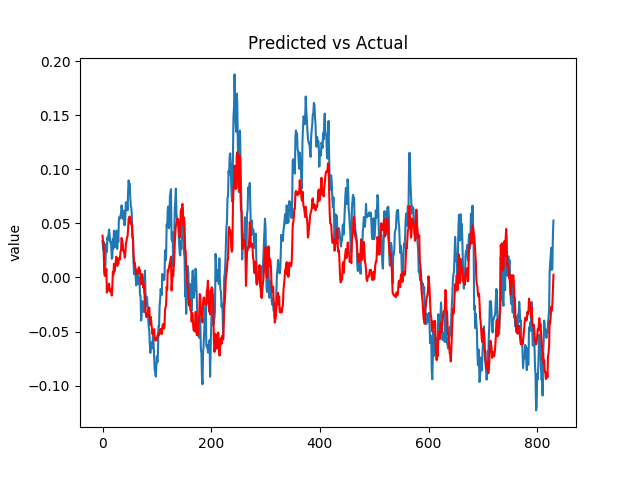

In [11]:
predicted = model.predict(x_test)
predicted = np.reshape(predicted, (predicted.size,))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Predicted vs Actual')
ax.set_ylabel('value')
plt.plot([i for i in range(0,len(y_test))] , y_test)
plt.plot([i for i in range(0,len(y_test))] , predicted , 'r')
plt.show()

In [7]:
y_train.shape

(1246,)